# Preprocessing Dataset NYC 311

## Load the dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
random.seed(26)

only load 500k rows since the original has more than 10M rows (filesize 2.37 GB)

In [3]:
%%time
filename = "C:\\Users\\azuka\\Downloads\\311_Service_Requests_from_2010_to_Present_min.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 500000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df_raw = pd.read_csv(filename, skiprows=skip, index_col=False)

Wall time: 3min 41s


In [5]:
df_raw

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,12,45529310,02/02/2020 09:12:29 AM,NaN,PLUMBING,RESIDENTIAL BUILDING,11433.0,109-25 MERRICK BOULEVARD,MERRICK BOULEVARD,ADDRESS,Jamaica,Open,The following complaint conditions are still o...,QUEENS,40.696782,-73.783742
1,13,45528385,02/02/2020 01:53:34 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11238.0,189 ST MARKS AVENUE,ST MARKS AVENUE,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.678814,-73.969791
2,18,45528877,02/02/2020 11:10:08 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10031.0,529 WEST 151 STREET,WEST 151 STREET,ADDRESS,NEW YORK,Open,The complaint you filed is a duplicate of a co...,MANHATTAN,40.829434,-73.945791
3,42,45530355,02/02/2020 09:29:29 PM,NaN,WATER LEAK,RESIDENTIAL BUILDING,10036.0,355 WEST 45 STREET,WEST 45 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.759810,-73.989907
4,50,45531148,02/02/2020 06:13:17 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11104.0,39-88 49 STREET,49 STREET,ADDRESS,Sunnyside,Open,The complaint you filed is a duplicate of a co...,QUEENS,40.746623,-73.915167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,6019756,44060230,10/15/2019 08:29:04 PM,10/15/2019 08:49:09 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10026.0,2196 FREDERICK DOUGLASS BOULEVARD,FREDERICK DOUGLASS BOULEVARD,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.805981,-73.954215
499996,6019780,44061331,10/15/2019 12:13:52 PM,10/16/2019 07:17:26 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11225.0,580 FLATBUSH AVENUE,FLATBUSH AVENUE,ADDRESS,BROOKLYN,Closed,The complaint you filed is a duplicate of a co...,BROOKLYN,40.659576,-73.960577
499997,6019784,44061354,10/15/2019 07:33:41 AM,10/16/2019 05:31:49 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10468.0,2800 UNIVERSITY AVENUE,UNIVERSITY AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.871572,-73.899193
499998,6019819,44063499,10/15/2019 04:57:42 PM,10/16/2019 02:04:54 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,15 EAST MOSHOLU PARKWAY NORTH,EAST MOSHOLU PARKWAY NORTH,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.879973,-73.883536


In [6]:
df_raw.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df_raw.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

There's an abnormally high data at 00 hour, which might mean that rows with unspecified time are given 00:00:00 time.

In [7]:
df_raw['Created Date'].astype('datetime64[ns]').dt.hour.value_counts()

0     283717
11     17453
12     17013
10     16749
13     15462
14     14774
9      14104
15     14024
16     13517
17     11862
18     10206
19      9363
8       9273
20      9155
21      8293
7       7033
22      7022
23      5637
6       4473
1       2869
5       2518
2       1957
4       1833
3       1693
Name: Created Date, dtype: int64

In [8]:
# # df_raw.Status.apply(len)
# datena = df_raw[df_raw['Created Date'].astype('datetime64[ns]').apply(len)<19].index
# df_2 = df_raw.drop(index=datena)
# df_2['hour'] = df_2['Created Date'].astype('datetime64[ns]').dt.hour
# df_2['year'] = df_2['Created Date'].astype('datetime64[ns]').dt.year
# len(df_2)

In [9]:
# zerohour = df_2[df_2['Created Date'].str.contains('00:00:00')].index
# df_2.drop(index=df_2[df_2['Created Date'].str.contains('00:00:00')].index, inplace=True)
# len(df_2)

In [10]:
df_raw['Created Date'] = pd.to_datetime(df_raw['Created Date'])
df_raw['Closed Date'] = pd.to_datetime(df_raw['Closed Date'])

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              500000 non-null  int64         
 1   Created Date            500000 non-null  datetime64[ns]
 2   Closed Date             489505 non-null  datetime64[ns]
 3   Complaint Type          500000 non-null  object        
 4   Location Type           495608 non-null  object        
 5   Incident Zip            493297 non-null  float64       
 6   Incident Address        495608 non-null  object        
 7   Street Name             495608 non-null  object        
 8   Address Type            492921 non-null  object        
 9   City                    493324 non-null  object        
 10  Status                  500000 non-null  object        
 11  Resolution Description  499334 non-null  object        
 12  Borough                 500000

### Column information

1. Created Date = Date SR was created
1. Unique Key = Unique identifier of a Service Request (SR) in the open data set
1. Complaint Type = This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.
1. Incident Zip = Incident location zip code, provided by geo validation.
1. Incident Address = House number of incident address provided by submitter.
1. Street Name = Street name of incident address provided by the submitter
1. Address Type = Type of incident location information available.
1. City = City of the incident location provided by geovalidation.
1. Resolution Description = Describes the last action taken on the SR by the responding agency. May describe next or future steps.
1. Borough = Provided by the submitter and confirmed by geovalidation.
1. Latitude = Geo based Lat of the incident location
1. Longitude = Geo based Long of the incident location
1. Closed Date = Date SR was closed by responding agency
1. Location Type = Describes the type of location used in the address information
1. Status = Status of SR submitted

In [12]:
for col in df_raw.select_dtypes('object').columns:
    print(f'{col} ({df_raw[col].nunique()})')
    print(df_raw[col].value_counts())
    print('\n')

Complaint Type (26)
HEAT/HOT WATER            104721
HEATING                    73689
PLUMBING                   59019
GENERAL CONSTRUCTION       41519
UNSANITARY CONDITION       37219
PAINT - PLASTER            30282
PAINT/PLASTER              28679
ELECTRIC                   25574
NONCONST                   21725
DOOR/WINDOW                17001
WATER LEAK                 16212
GENERAL                    12537
FLOORING/STAIRS            11527
APPLIANCE                   9485
HPD Literature Request      4392
SAFETY                      4198
OUTSIDE BUILDING             610
ELEVATOR                     537
CONSTRUCTION                 463
Unsanitary Condition         456
General                      110
Safety                        41
Electric                       1
Outside Building               1
Plumbing                       1
AGENCY                         1
Name: Complaint Type, dtype: int64


Location Type (3)
RESIDENTIAL BUILDING    494998
Residential Building       608
Build

In [13]:
df_raw.isna().sum()/len(df_raw)*100

Unique Key                0.0000
Created Date              0.0000
Closed Date               2.0990
Complaint Type            0.0000
Location Type             0.8784
Incident Zip              1.3406
Incident Address          0.8784
Street Name               0.8784
Address Type              1.4158
City                      1.3352
Status                    0.0000
Resolution Description    0.1332
Borough                   0.0000
Latitude                  1.3404
Longitude                 1.3404
dtype: float64

In [14]:
df_raw.duplicated().sum()

0

In [15]:
df_complaint = df_raw['Complaint Type'].value_counts().to_frame()
df_complaint['%'] = (df_complaint['Complaint Type']/len(df_raw)).apply(lambda x: round(x*100, 2))

In [16]:
df_complaint

,Complaint Type,%
HEAT/HOT WATER,104721,20.94
HEATING,73689,14.74
PLUMBING,59019,11.80
GENERAL CONSTRUCTION,41519,8.30
UNSANITARY CONDITION,37219,7.44
PAINT - PLASTER,30282,6.06
PAINT/PLASTER,28679,5.74
ELECTRIC,25574,5.11
NONCONST,21725,4.35
DOOR/WINDOW,17001,3.40


In [17]:
df_complaint.head(10).sort_values(by='Complaint Type', ascending=True)

,Complaint Type,%
DOOR/WINDOW,17001,3.40
NONCONST,21725,4.35
ELECTRIC,25574,5.11
PAINT/PLASTER,28679,5.74
PAINT - PLASTER,30282,6.06
UNSANITARY CONDITION,37219,7.44
GENERAL CONSTRUCTION,41519,8.30
PLUMBING,59019,11.80
HEATING,73689,14.74
HEAT/HOT WATER,104721,20.94


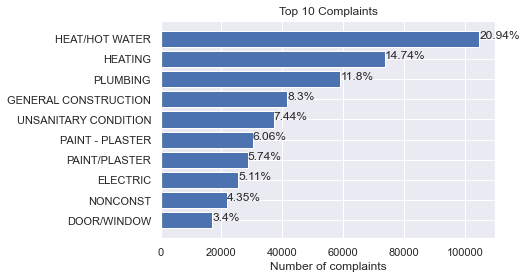

In [18]:
plt.barh(df_complaint.head(10).sort_values(by='Complaint Type', ascending=True).index, df_complaint.head(10).sort_values(by='Complaint Type', ascending=True)['Complaint Type'].head(10))
for i in df_complaint.head(10).sort_values(by='Complaint Type', ascending=True).index:
    plt.annotate(f"{df_complaint.loc[i, '%']}%",
             xy=(df_complaint.loc[i, 'Complaint Type']+3, i))
plt.title('Top 10 Complaints')
plt.xlabel('Number of complaints')
plt.show()

In [23]:
df_raw['Complaint Type'] = df_raw['Complaint Type'].str.upper()
df_raw['Complaint Type'].unique()

array(['PLUMBING', 'UNSANITARY CONDITION', 'HEAT/HOT WATER', 'WATER LEAK',
       'APPLIANCE', 'PAINT/PLASTER', 'ELECTRIC', 'DOOR/WINDOW',
       'FLOORING/STAIRS', 'GENERAL', 'SAFETY', 'OUTSIDE BUILDING',
       'ELEVATOR', 'HPD LITERATURE REQUEST', 'HEATING',
       'GENERAL CONSTRUCTION', 'NONCONST', 'PAINT - PLASTER',
       'CONSTRUCTION', 'AGENCY'], dtype=object)

**HEATING** and **HEAT/HOT WATER** complaints are the same

In [24]:
df_raw[df_raw['Complaint Type'] == 'HEAT/HOT WATER']['Created Date'].dt.year.value_counts()

2016    18946
2015    18757
2018    18717
2017    17731
2019    17473
2014    10975
2020     2122
Name: Created Date, dtype: int64

In [25]:
df_raw[df_raw['Complaint Type'] == 'HEATING']['Created Date'].dt.year.value_counts()

2010    17787
2013    16864
2011    15770
2012    15151
2014     8117
Name: Created Date, dtype: int64

**GENERAL**, **GENERAL CONSTRUCTION** and **CONSTRUCTION** are not the same

In [27]:
df_raw[df_raw['Complaint Type'] == 'GENERAL']['Created Date'].dt.year.value_counts()

2016    2230
2015    2179
2014    2158
2018    2131
2017    2080
2019    1674
2013     119
2020      75
2012       1
Name: Created Date, dtype: int64

In [28]:
df_raw[df_raw['Complaint Type'] == 'GENERAL CONSTRUCTION']['Created Date'].dt.year.value_counts()

2011    11087
2010    10641
2013     9277
2012     9201
2014     1313
Name: Created Date, dtype: int64

In [31]:
df_raw[df_raw['Complaint Type'] == 'CONSTRUCTION']['Created Date'].dt.year.value_counts()

2011    135
2010    109
2013    102
2012     95
2014     22
Name: Created Date, dtype: int64

In [30]:
df_raw[(df_raw['Complaint Type'] == 'CONSTRUCTION') | (df_raw['Complaint Type'] == 'GENERAL CONSTRUCTION') | (df_raw['Complaint Type'] == 'GENERAL')]['Created Date'].dt.year.value_counts()

2011    11222
2010    10750
2013     9498
2012     9297
2014     3493
2016     2230
2015     2179
2018     2131
2017     2080
2019     1674
2020       75
Name: Created Date, dtype: int64

removing duplicate complaint type

In [32]:
%%time
df_raw['Complaint Type'] = df_raw['Complaint Type'].replace({'HEATING':'HEAT/HOT WATER', \
                                                             'PAINT - PLASTER':'PAINT/PLASTER'})
df_raw['Complaint Type'].value_counts()

Wall time: 773 ms


HEAT/HOT WATER            178410
PLUMBING                   59020
PAINT/PLASTER              58961
GENERAL CONSTRUCTION       41519
UNSANITARY CONDITION       37675
ELECTRIC                   25575
NONCONST                   21725
DOOR/WINDOW                17001
WATER LEAK                 16212
GENERAL                    12647
FLOORING/STAIRS            11527
APPLIANCE                   9485
HPD LITERATURE REQUEST      4392
SAFETY                      4239
OUTSIDE BUILDING             611
ELEVATOR                     537
CONSTRUCTION                 463
AGENCY                         1
Name: Complaint Type, dtype: int64

Checking top 10 complaints

In [33]:
df_complaint = df_raw['Complaint Type'].value_counts().to_frame()
df_complaint['%'] = (df_complaint['Complaint Type']/len(df_raw)).apply(lambda x: round(x*100, 2))

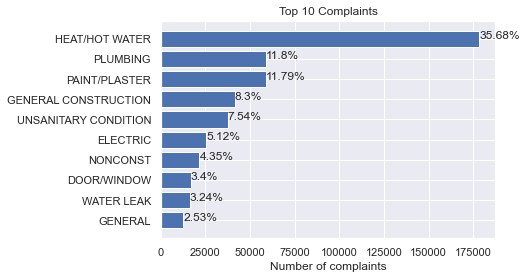

Wall time: 1.65 s


In [34]:
%%time
plt.barh(df_complaint.head(10).sort_values(by='Complaint Type', ascending=True).index, df_complaint.head(10).sort_values(by='Complaint Type', ascending=True)['Complaint Type'].head(10))
for i in df_complaint.head(10).sort_values(by='Complaint Type', ascending=True).index:
    plt.annotate(f"{df_complaint.loc[i, '%']}%",
             xy=(df_complaint.loc[i, 'Complaint Type']+3, i))
plt.title('Top 10 Complaints')
plt.xlabel('Number of complaints')
plt.show()

In [35]:
def check_values(df):
    col_desc = []
    data = {
        'features': [col for col in df.columns],
        'data_type': [df[col].dtype for col in df.columns],
        'nan_total': [df[col].isna().sum() for col in df.columns],
        'nan_pct': [round(df[col].isna().sum()/len(df)*100,2) for col in df.columns],
        'unique': [df[col].nunique() for col in df.columns],
        'values_ex': [df[col].drop_duplicates().sample(df[col].nunique()).values if df[col].nunique() <= 5 else df[col].drop_duplicates().sample(2).values for col in df.columns]
    }
    return pd.DataFrame(data)

In [36]:
%%time
check_values(df_raw)

Wall time: 6.19 s


,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,500000,"[29299442, 38043390]"
1,Created Date,datetime64[ns],0,0.00,206349,"[2018-06-30T15:58:36.000000000, 2018-01-30T16:..."
2,Closed Date,datetime64[ns],10495,2.10,174574,"[2017-12-18T09:32:24.000000000, 2012-08-09T00:..."
3,Complaint Type,object,0,0.00,18,"[PLUMBING, GENERAL]"
4,Location Type,object,4392,0.88,3,"[Residential Building, Building-Wide, nan]"
5,Incident Zip,float64,6703,1.34,183,"[11238.0, 10028.0]"
6,Incident Address,object,4392,0.88,85117,"[581 EAST 81 STREET, 1926 BLEECKER STREET]"
7,Street Name,object,4392,0.88,5202,"[SWAN STREET, MEXICO STREET]"
8,Address Type,object,7079,1.42,1,[ADDRESS]
9,City,object,6676,1.34,89,"[Ridgewood, LONG ISLAND CITY]"


drop data from 2020 because we only have the data until February

In [39]:
df_raw.drop(index=df_raw[df_raw['Created Date'].dt.year == 2020].index, inplace=True)
len(df_raw)

496930

In [40]:
df_raw.drop(columns=['Closed Date', 'Resolution Description'], inplace=True)
len(df_raw)

496930

In [41]:
df_raw.to_csv('data_raw_500k.csv', index=False)
print('finish')

finish


In [42]:
# df_raw = pd.read_csv('data_raw_100k.csv', parse_dates=['Created Date', 'Closed Date'])
df_prep = pd.read_csv('data_raw_500k.csv')
df_prep

,Unique Key,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Borough,Latitude,Longitude
0,45284700,2019-12-31 15:02:46,ELECTRIC,RESIDENTIAL BUILDING,10031.0,605 WEST 142 STREET,WEST 142 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,40.824694,-73.952255
1,45284480,2019-12-31 18:39:21,PAINT/PLASTER,RESIDENTIAL BUILDING,11423.0,91-21 195 STREET,195 STREET,ADDRESS,Hollis,Closed,QUEENS,40.712909,-73.765953
2,45281951,2019-12-31 13:14:22,WATER LEAK,RESIDENTIAL BUILDING,10463.0,3008 KINGSBRIDGE AVENUE,KINGSBRIDGE AVENUE,ADDRESS,BRONX,Closed,BRONX,40.878598,-73.907716
3,45281658,2019-12-31 18:29:57,GENERAL,RESIDENTIAL BUILDING,10472.0,1233 WHITE PLAINS ROAD,WHITE PLAINS ROAD,ADDRESS,BRONX,Closed,BRONX,40.831489,-73.862073
4,45281388,2019-12-31 18:41:56,HEAT/HOT WATER,RESIDENTIAL BUILDING,11365.0,159-10 71 AVENUE,71 AVENUE,ADDRESS,Fresh Meadows,Closed,QUEENS,40.730344,-73.809384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496925,44060230,2019-10-15 20:29:04,HEAT/HOT WATER,RESIDENTIAL BUILDING,10026.0,2196 FREDERICK DOUGLASS BOULEVARD,FREDERICK DOUGLASS BOULEVARD,ADDRESS,NEW YORK,Closed,MANHATTAN,40.805981,-73.954215
496926,44061331,2019-10-15 12:13:52,HEAT/HOT WATER,RESIDENTIAL BUILDING,11225.0,580 FLATBUSH AVENUE,FLATBUSH AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,40.659576,-73.960577
496927,44061354,2019-10-15 07:33:41,HEAT/HOT WATER,RESIDENTIAL BUILDING,10468.0,2800 UNIVERSITY AVENUE,UNIVERSITY AVENUE,ADDRESS,BRONX,Closed,BRONX,40.871572,-73.899193
496928,44063499,2019-10-15 16:57:42,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,15 EAST MOSHOLU PARKWAY NORTH,EAST MOSHOLU PARKWAY NORTH,ADDRESS,BRONX,Closed,BRONX,40.879973,-73.883536


In [43]:
df_prep['Created Date'].astype('datetime64[ns]').dt.hour.value_counts()

0     283676
11     17252
12     16826
10     16552
13     15299
14     14599
9      13917
15     13862
16     13348
17     11672
18     10016
19      9214
8       9148
20      8988
21      8132
7       6933
22      6890
23      5524
6       4401
1       2850
5       2465
2       1919
4       1791
3       1656
Name: Created Date, dtype: int64

look for the rows with no time data (only date) then drop the row

In [46]:
%%time
df_prep['Created Date'].apply(len).value_counts()

Wall time: 580 ms


19    327706
10    169224
Name: Created Date, dtype: int64

In [48]:
df_prep[df_prep['Created Date'].apply(len)<19]['Created Date'].astype('datetime64[ns]').dt.year.value_counts()

2011    54839
2010    50458
2012    33159
2013    30768
Name: Created Date, dtype: int64

In [49]:
df_prep[df_prep['Created Date'].apply(len)==19]['Created Date'].astype('datetime64[ns]').dt.year.value_counts()

2015    52248
2018    50843
2014    50723
2016    49619
2017    47465
2019    38564
2013    17579
2012    13845
2010     6157
2011      663
Name: Created Date, dtype: int64

In [50]:
df_prep[df_prep['Created Date'].apply(len)<19]['Created Date'].astype('datetime64[ns]').dt.month.value_counts()

11    22195
1     18681
2     17370
10    16689
3     14310
12    13500
5     11910
7     11897
6     11662
4     11288
9      9968
8      9754
Name: Created Date, dtype: int64

In [51]:
df_prep[df_prep['Created Date'].apply(len)==19]['Created Date'].astype('datetime64[ns]').dt.month.value_counts()

1     50557
12    41451
2     33050
11    32530
3     31509
10    26762
4     23803
8     19510
9     17984
5     17581
7     16553
6     16416
Name: Created Date, dtype: int64

In [54]:
df_prep[df_prep['Created Date'].astype('datetime64[ns]').dt.year.isin([2010,2011,2012,2013])]

,Unique Key,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Borough,Latitude,Longitude
10002,23391759,2012-06-09 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10016.0,330 EAST 39 STREET,EAST 39 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,40.747387,-73.972355
10003,23381864,2012-06-08 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,40.863805,-73.925358
10004,23311152,2012-05-28 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,40.863805,-73.925358
10005,23276016,2012-05-22 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,40.863805,-73.925358
10006,23225573,2012-05-14 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,40.863805,-73.925358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221342,27024747,2013-12-31 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,11207.0,224 SCHAEFER STREET,SCHAEFER STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,40.690805,-73.906703
221343,27024751,2013-12-31 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10468.0,2849 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,Closed,BRONX,40.873240,-73.900680
221344,27024753,2013-12-31 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10026.0,1975 ADAM C POWELL BOULEVARD,ADAM C POWELL BOULEVARD,ADDRESS,NEW YORK,Closed,MANHATTAN,40.804937,-73.951261
221345,27024768,2013-12-31 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,3171 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,Closed,BRONX,40.875243,-73.880482


In [55]:
drop_oldyear = df_prep[df_prep['Created Date'].astype('datetime64[ns]').dt.year.isin([2010,2011,2012,2013])].index
df_prep.drop(index=drop_oldyear, inplace=True)
len(df_prep)

289462

no more rows with no time data

In [56]:
df_prep[df_prep['Created Date'].apply(len)<19]

,Unique Key,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Borough,Latitude,Longitude


instead, there are many rows with no time data but filled with 00:00:00 value since there are still abnormally high number of complaints on 00 hour

In [58]:
df_prep['Created Date'].astype('datetime64[ns]').dt.hour.value_counts()

0     78231
11    17056
12    16634
10    16365
13    15126
14    14441
9     13778
15    13700
16    13208
17    11559
18     9927
19     9132
8      9075
20     8915
21     8082
7      6900
22     6826
23     5495
6      4384
1      2836
5      2455
2      1908
4      1783
3      1646
Name: Created Date, dtype: int64

In [57]:
df_prep[df_prep['Created Date'].str.contains('00:00:00')]

,Unique Key,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Borough,Latitude,Longitude
15295,27217780,2014-01-22 00:00:00,ELECTRIC,RESIDENTIAL BUILDING,NaN,229 CATHEDRAL PARKWAY,CATHEDRAL PARKWAY,ADDRESS,NaN,Closed,MANHATTAN,NaN,NaN
15309,27318260,2014-02-03 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10039.0,215 WEST 145 STREET,WEST 145 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,40.821971,-73.939839
15319,27569942,2014-03-04 00:00:00,PLUMBING,RESIDENTIAL BUILDING,NaN,3034 ALBANY CRESCENT,ALBANY CRESCENT,ADDRESS,NaN,Closed,BROOKLYN,NaN,NaN
15325,27643211,2014-03-14 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,NaN,63-02 GRAND CENTRAL PARKWAY NORTH,GRAND CENTRAL PARKWAY NORTH,ADDRESS,NaN,Closed,QUEENS,NaN,NaN
15330,27867441,2014-04-17 00:00:00,UNSANITARY CONDITION,RESIDENTIAL BUILDING,NaN,119-02 119 STREET,119 STREET,ADDRESS,NaN,Closed,QUEENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297455,30820379,2015-06-10 00:00:00,GENERAL,RESIDENTIAL BUILDING,11378.0,52-54 65 PLACE,65 PLACE,ADDRESS,Maspeth,Closed,QUEENS,40.732360,-73.900121
297542,30828951,2015-06-11 00:00:00,GENERAL,RESIDENTIAL BUILDING,10019.0,859 9 AVENUE,9 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,40.767108,-73.986314
297548,30829012,2015-06-11 00:00:00,PLUMBING,RESIDENTIAL BUILDING,11385.0,1923 WOODBINE STREET,WOODBINE STREET,ADDRESS,Ridgewood,Closed,QUEENS,40.704744,-73.904538
456834,40606493,2018-10-21 00:00:00,HEAT/HOT WATER,RESIDENTIAL BUILDING,10065.0,43 EAST 67 STREET,EAST 67 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,40.768410,-73.967292


In [59]:
zerohour = df_prep[df_prep['Created Date'].str.contains('00:00:00')].index
df_prep.drop(index=df_prep[df_prep['Created Date'].str.contains('00:00:00')].index, inplace=True)
len(df_prep)

215036

In [61]:
%%time
df_prep['hour'] = df_prep['Created Date'].astype('datetime64[ns]').dt.hour
df_prep['month'] = df_prep['Created Date'].astype('datetime64[ns]').dt.month
df_prep['year'] = df_prep['Created Date'].astype('datetime64[ns]').dt.year

Wall time: 2.13 s


number of complaints at hour 00 now looks normal

In [62]:
df_prep.hour.value_counts()

11    17056
12    16634
10    16365
13    15126
14    14441
9     13778
15    13700
16    13208
17    11559
18     9927
19     9132
8      9075
20     8915
21     8082
7      6900
22     6826
23     5495
6      4384
0      3805
1      2836
5      2455
2      1908
4      1783
3      1646
Name: hour, dtype: int64

In [63]:
%%time
hour_complaint = pd.crosstab(df_prep.hour, df_prep['Complaint Type'])#.rename_axis(None, axis=1).rename_axis(None, axis=0).rename(columns={0.0:'No',1.0:'Yes'})*100
hour_complaint
# hourinfl

Wall time: 708 ms


Complaint Type,AGENCY,APPLIANCE,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,HEAT/HOT WATER,HPD LITERATURE REQUEST,NONCONST,OUTSIDE BUILDING,PAINT/PLASTER,PLUMBING,SAFETY,UNSANITARY CONDITION,WATER LEAK
hour,,,,,,,,,,,,,,,,
0,0,37,176,150,10,86,121,2104,23,0,1,189,238,47,448,175
1,0,36,129,92,5,63,68,1649,13,0,5,145,172,34,312,113
2,0,15,74,80,2,34,53,1124,6,0,2,81,93,24,239,81
3,0,23,59,56,3,27,29,999,8,0,3,81,91,12,185,70
4,0,17,61,62,5,42,49,1109,11,0,0,94,102,17,156,58
5,0,36,73,69,2,38,49,1673,12,0,0,97,133,22,178,73
6,0,52,125,131,19,73,76,2947,26,0,3,163,261,32,328,148
7,0,96,236,243,27,130,183,4110,30,0,7,365,413,84,648,328
8,0,148,441,333,24,301,345,4293,80,0,20,751,638,119,1119,463


<timed exec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator


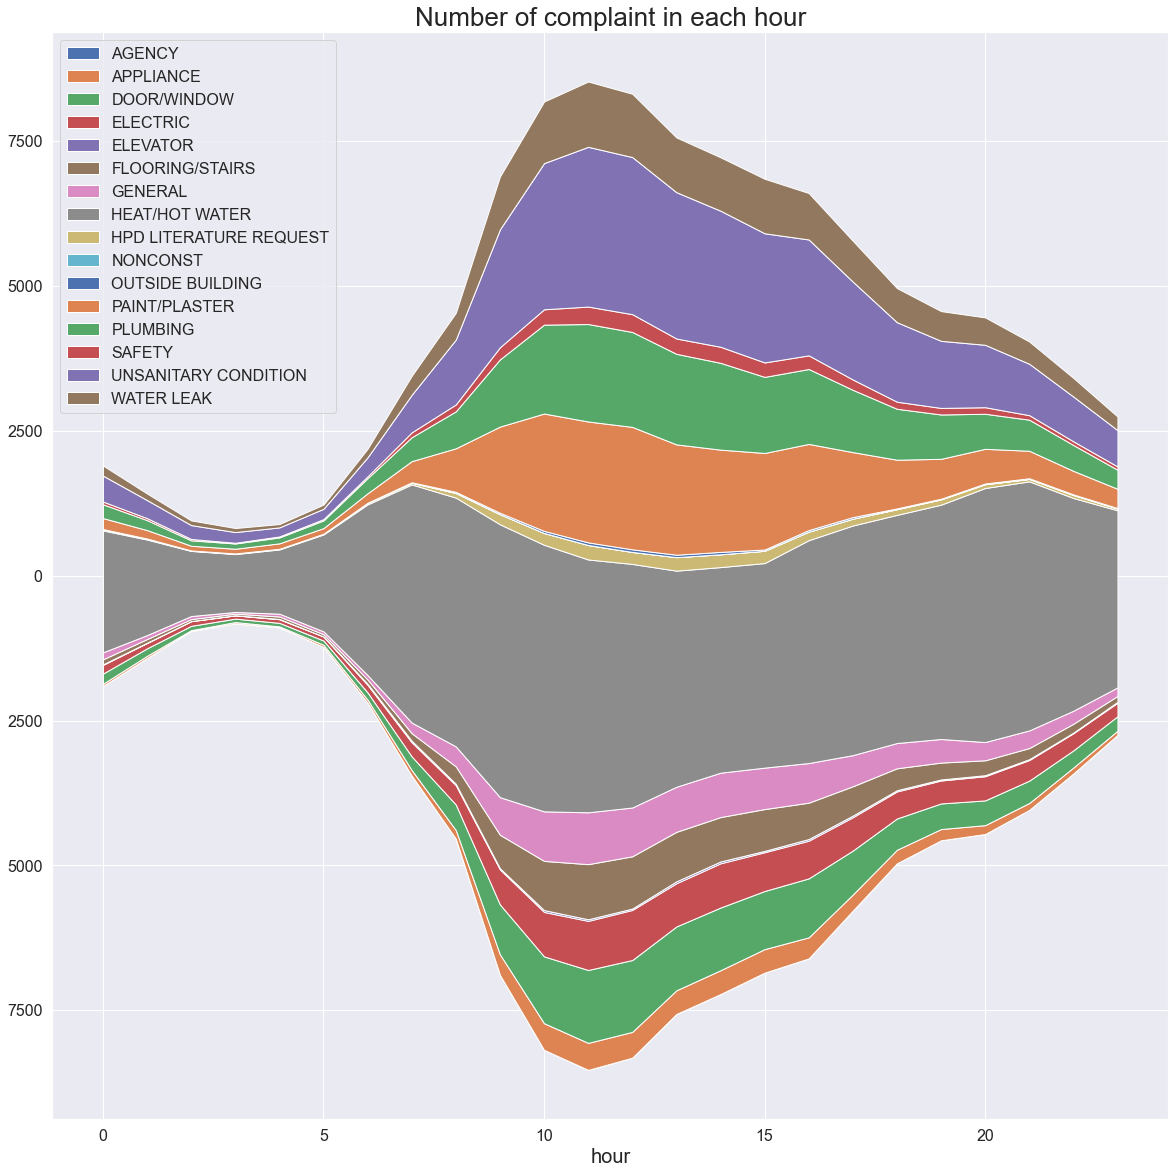

Wall time: 4.94 s


In [64]:
%%time
fig,ax = plt.subplots(figsize=(20,20))
plt.stackplot(hour_complaint.index, [hour_complaint[col].values for col in hour_complaint.columns], baseline='sym')
ticks =  ax.get_yticks()
# ax.set_xticklabels(fontsize=16)
plt.xticks(fontsize=16)
ax.set_yticklabels([int(abs(tick)) for tick in ticks], fontsize=16)
plt.legend(hour_complaint.columns, prop={'size': 16}, loc='upper left')
plt.title('Number of complaint in each hour', size=26)
plt.xlabel('hour', fontsize=20)
plt.savefig("streamgraph-complaint.png") 
plt.show()

In [67]:
df_prep.year.value_counts()

2018    50842
2016    49619
2017    47465
2019    38563
2015    28145
2014      402
Name: year, dtype: int64

In [68]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,215036,"[44923650, 37906686]"
1,Created Date,object,0,0.00,199257,"[2017-11-30 06:59:13, 2018-07-04 19:29:46]"
2,Complaint Type,object,0,0.00,16,"[AGENCY, ELEVATOR]"
3,Location Type,object,2357,1.10,3,"[Residential Building, Building-Wide, nan]"
4,Incident Zip,float64,3054,1.42,182,"[11355.0, 10018.0]"
5,Incident Address,object,2357,1.10,48931,"[88-17 133 AVENUE, 11 STANTON STREET]"
6,Street Name,object,2357,1.10,4327,"[EAST 88 STREET, 123 AVENUE]"
7,Address Type,object,3581,1.67,1,[nan]
8,City,object,3030,1.41,47,"[Saint Albans, Little Neck]"
9,Status,object,0,0.00,3,"[Open, In Progress, Closed]"


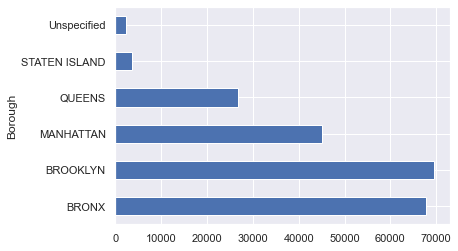

Wall time: 1.27 s


In [70]:
%%time
df_prep.groupby('Borough')['Borough'].count().plot.barh()
plt.show()

Fill 'Unspecified' Borough with the value from other location column

In [71]:
df_prep[df_prep['Borough'] == 'Unspecified'][['Borough', 'City', 'Street Name', 'Incident Zip']]

,Borough,City,Street Name,Incident Zip
8505,Unspecified,NaN,NaN,NaN
8506,Unspecified,NaN,NaN,NaN
8507,Unspecified,NaN,NaN,NaN
8508,Unspecified,NaN,NaN,NaN
8509,Unspecified,NaN,NaN,NaN
...,...,...,...,...
17386,Unspecified,NaN,NaN,NaN
17387,Unspecified,NaN,NaN,NaN
432532,Unspecified,NEW YORK,WEST 225 STREET,10463.0
494020,Unspecified,NEW YORK,ADAM C POWELL BOULEVARD,10030.0


In [72]:
df_prep[(df_prep['Borough'] == 'Unspecified')&(~df_prep['Incident Zip'].isna())][['Borough', 'City', 'Street Name', 'Incident Zip']]

,Borough,City,Street Name,Incident Zip
432532,Unspecified,NEW YORK,WEST 225 STREET,10463.0
494020,Unspecified,NEW YORK,ADAM C POWELL BOULEVARD,10030.0
494024,Unspecified,NEW YORK,HILLSIDE AVENUE,10040.0


In [73]:
df_prep[(df_prep['Borough'] == 'Unspecified')&(~df_prep['Street Name'].isna())][['Borough', 'City', 'Street Name', 'Incident Zip']]

,Borough,City,Street Name,Incident Zip
13181,Unspecified,NaN,SURF AVENUE,NaN
432532,Unspecified,NEW YORK,WEST 225 STREET,10463.0
494020,Unspecified,NEW YORK,ADAM C POWELL BOULEVARD,10030.0
494024,Unspecified,NEW YORK,HILLSIDE AVENUE,10040.0


the **INCIDENT ADDRESS** column is very vital for the next stage, so I will remove rows with null value

In [75]:
df_prep[df_prep['Incident Address'].isna()].year.value_counts()

2015    1120
2017     353
2016     351
2018     274
2014     152
2019     107
Name: year, dtype: int64

In [76]:
df_prep.year.value_counts()

2018    50842
2016    49619
2017    47465
2019    38563
2015    28145
2014      402
Name: year, dtype: int64

In [77]:
df_prep.drop(index=df_prep[df_prep['Incident Address'].isna()].index, inplace=True)
len(df_prep)

212679

In [78]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,212679,"[41880306, 40997983]"
1,Created Date,object,0,0.00,196903,"[2015-10-13 12:11:44, 2019-10-21 01:14:37]"
2,Complaint Type,object,0,0.00,15,"[OUTSIDE BUILDING, DOOR/WINDOW]"
3,Location Type,object,0,0.00,3,"[Residential Building, Building-Wide, RESIDENT..."
4,Incident Zip,float64,697,0.33,182,"[11433.0, 11363.0]"
5,Incident Address,object,0,0.00,48931,"[47-25 48 STREET, 757 DUMONT AVENUE]"
6,Street Name,object,0,0.00,4327,"[78 ROAD, COURTLANDT AVENUE]"
7,Address Type,object,1227,0.58,1,[ADDRESS]
8,City,object,673,0.32,47,"[Forest Hills, nan]"
9,Status,object,0,0.00,3,"[In Progress, Open, Closed]"


some of the address have double spaces, which will hinder merging process for the next stage

In [79]:
df_prep['Incident Address'] = df_prep['Incident Address'].apply(lambda x: ' '.join(x.split()))
df_prep['Incident Address'].nunique()

47640

In [80]:
df_prep['Incident Address'] = df_prep['Incident Address'].str.upper()
df_prep['Incident Address'].nunique()

47640

filling **INCIDENT ZIP** based on **INCIDENT ADDRESS**

In [81]:
df_prep[df_prep['Incident Zip'].isna()]['Incident Address'].nunique()

561

In [82]:
df_prep[~df_prep['Incident Zip'].isna()]['Incident Address'].nunique()

47549

In [83]:
zipisi = list(set(df_prep[df_prep['Incident Zip'].isna()]['Incident Address'].unique()).intersection(set(df_prep[~df_prep['Incident Zip'].isna()]['Incident Address'].unique())))
len(zipisi)

470

In [84]:
zipisi[:5]

['1445 GENEVA LOOP',
 '65 SEAMAN AVENUE',
 '1005 JEROME AVENUE',
 '146 WEST 124 STREET',
 '8851 20 AVENUE']

In [91]:
%%time
zip_adr = [df_prep[~(df_prep['Incident Zip'].isna()) & (df_prep['Incident Address'] == i)]['Incident Zip'].head(1) for i in zipisi]
len(zip_adr)

Wall time: 29.9 s


470

In [92]:
zip_adr[:5]

[371971    11239.0
 Name: Incident Zip, dtype: float64,
 311351    10034.0
 Name: Incident Zip, dtype: float64,
 242    10452.0
 Name: Incident Zip, dtype: float64,
 480143    10027.0
 Name: Incident Zip, dtype: float64,
 3552    11214.0
 Name: Incident Zip, dtype: float64]

In [93]:
zip_filled = zip(zipisi, zip_adr)
zip_filled

In [94]:
%%time
for i, j in zip_filled:
    df_prep['Incident Zip'] = np.where((df_prep['Incident Zip'].isna()) & (df_prep['Incident Address'] == i), j, df_prep['Incident Zip'])
df_prep[df_prep['Incident Zip'].isna()][['Borough', 'City', 'Street Name', 'Incident Address', 'Incident Zip']]

Wall time: 32 s


,Borough,City,Street Name,Incident Address,Incident Zip
604,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,2411 FREDERICK DOUGAL BOULEVARD,NaN
1450,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,63-08 GRAND CENTRAL PARKWAY NORTH,NaN
1453,QUEENS,NaN,BEACH 84 STREET,3-16 BEACH 84 STREET,NaN
2876,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,63-08 GRAND CENTRAL PARKWAY NORTH,NaN
5188,QUEENS,NaN,BEACH 20 STREET,8 BEACH 20 STREET,NaN
...,...,...,...,...,...
17228,BROOKLYN,NaN,MATHER GASTON BOULEVARD,280 MATHER GASTON BOULEVARD,NaN
17241,BROOKLYN,NaN,BRIGHTON BEACH AVENUE,1146 BRIGHTON BEACH AVENUE,NaN
17291,MANHATTAN,NaN,HARATIO STREET,2 HARATIO STREET,NaN
17292,MANHATTAN,NaN,HARATIO STREET,2 HARATIO STREET,NaN


In [95]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,212679,"[36276111, 41699708]"
1,Created Date,object,0,0.00,196903,"[2018-11-12 12:47:28, 2018-07-05 15:09:19]"
2,Complaint Type,object,0,0.00,15,"[GENERAL, UNSANITARY CONDITION]"
3,Location Type,object,0,0.00,3,"[RESIDENTIAL BUILDING, Building-Wide, Resident..."
4,Incident Zip,float64,126,0.06,182,"[11413.0, 11411.0]"
5,Incident Address,object,0,0.00,47640,"[1150 FTELEY AVENUE, 172 UTICA AVENUE]"
6,Street Name,object,0,0.00,4327,"[WEST 103 STREET, RIVERSIDE DRIVE WEST]"
7,Address Type,object,1227,0.58,1,[nan]
8,City,object,673,0.32,47,"[Breezy Point, Maspeth]"
9,Status,object,0,0.00,3,"[Closed, Open, In Progress]"


filling missing value on **BOROUGH** column with data based on **INCIDENT ADDRESS**

In [98]:
df_prep[df_prep['Borough'] == 'Unspecified'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
13181,Unspecified,NaN,SURF AVENUE,11224.0,2201 SURF AVENUE
432532,Unspecified,NEW YORK,WEST 225 STREET,10463.0,38 WEST 225 STREET
494020,Unspecified,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD
494024,Unspecified,NEW YORK,HILLSIDE AVENUE,10040.0,25 HILLSIDE AVENUE


In [100]:
df_prep[df_prep['Incident Address'] == '2201 SURF AVENUE'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
13181,Unspecified,NaN,SURF AVENUE,11224.0,2201 SURF AVENUE
336832,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE
370607,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE
370637,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE


In [106]:
df_prep.loc[(df_prep['Borough'] == 'Unspecified')&(df_prep['Incident Address'] == '2201 SURF AVENUE'),'Borough'] = 'BROOKLYN'
df_prep.loc[(df_prep['City'].isna())&(df_prep['Incident Address'] == '2201 SURF AVENUE'),'City'] = 'BROOKLYN'
df_prep[df_prep['Incident Address'] == '2201 SURF AVENUE'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
13181,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE
336832,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE
370607,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE
370637,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE


In [109]:
df_prep[df_prep['Incident Address'] == '38 WEST 225 STREET'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
432532,NEW YORK,NEW YORK,WEST 225 STREET,10463.0,38 WEST 225 STREET


In [107]:
df_prep.loc[(df_prep['Borough'] == 'Unspecified')&(df_prep['Incident Address'] == '38 WEST 225 STREET'),'Borough'] = 'NEW YORK'
df_prep[df_prep['Incident Address'] == '38 WEST 225 STREET'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
432532,NEW YORK,NEW YORK,WEST 225 STREET,10463.0,38 WEST 225 STREET


In [110]:
df_prep.loc[(df_prep['Incident Address'] == '2488 ADAM C POWELL BOULEVARD'),'Borough'] = 'MANHATTAN'
df_prep[df_prep['Incident Address'] == '2488 ADAM C POWELL BOULEVARD'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
386608,MANHATTAN,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD
480657,MANHATTAN,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD
481560,MANHATTAN,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD
487079,MANHATTAN,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD
487115,MANHATTAN,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD
494020,MANHATTAN,NEW YORK,ADAM C POWELL BOULEVARD,10030.0,2488 ADAM C POWELL BOULEVARD


In [111]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,212679,"[41621392, 35056301]"
1,Created Date,object,0,0.00,196903,"[2018-11-11 14:23:13, 2018-06-04 16:11:26]"
2,Complaint Type,object,0,0.00,15,"[DOOR/WINDOW, SAFETY]"
3,Location Type,object,0,0.00,3,"[Building-Wide, RESIDENTIAL BUILDING, Resident..."
4,Incident Zip,float64,126,0.06,182,"[10013.0, 11432.0]"
5,Incident Address,object,0,0.00,47640,"[245 MILL ROAD, 87 MELROSE STREET]"
6,Street Name,object,0,0.00,4327,"[WEST BUCHANAN STREET, EAST 76 STREET]"
7,Address Type,object,1227,0.58,1,[nan]
8,City,object,672,0.32,47,"[Ridgewood, College Point]"
9,Status,object,0,0.00,3,"[Closed, Open, In Progress]"


In [113]:
df_prep[df_prep['Incident Zip'].isna()][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
604,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,NaN,2411 FREDERICK DOUGAL BOULEVARD
1450,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,NaN,63-08 GRAND CENTRAL PARKWAY NORTH
1453,QUEENS,NaN,BEACH 84 STREET,NaN,3-16 BEACH 84 STREET
2876,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,NaN,63-08 GRAND CENTRAL PARKWAY NORTH
5188,QUEENS,NaN,BEACH 20 STREET,NaN,8 BEACH 20 STREET
...,...,...,...,...,...
17228,BROOKLYN,NaN,MATHER GASTON BOULEVARD,NaN,280 MATHER GASTON BOULEVARD
17241,BROOKLYN,NaN,BRIGHTON BEACH AVENUE,NaN,1146 BRIGHTON BEACH AVENUE
17291,MANHATTAN,NaN,HARATIO STREET,NaN,2 HARATIO STREET
17292,MANHATTAN,NaN,HARATIO STREET,NaN,2 HARATIO STREET


In [114]:
df_prep[df_prep['Street Name'] == 'FREDERICK DOUGAL BOULEVARD'][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
604,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,NaN,2411 FREDERICK DOUGAL BOULEVARD
13146,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,NaN,2411 FREDERICK DOUGAL BOULEVARD
13152,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,NaN,2411 FREDERICK DOUGAL BOULEVARD
13173,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,NaN,2411 FREDERICK DOUGAL BOULEVARD


filling missing values for **CITY** column based on **STREET NAME**

In [118]:
df_prep[df_prep['City'].isna()][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
604,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,NaN,2411 FREDERICK DOUGAL BOULEVARD
1450,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,NaN,63-08 GRAND CENTRAL PARKWAY NORTH
1453,QUEENS,NaN,BEACH 84 STREET,NaN,3-16 BEACH 84 STREET
2876,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,NaN,63-08 GRAND CENTRAL PARKWAY NORTH
5188,QUEENS,NaN,BEACH 20 STREET,NaN,8 BEACH 20 STREET
...,...,...,...,...,...
17241,BROOKLYN,NaN,BRIGHTON BEACH AVENUE,NaN,1146 BRIGHTON BEACH AVENUE
17289,BRONX,NaN,ELLIS AVEUE,10472.0,2002 ELLIS AVEUE
17291,MANHATTAN,NaN,HARATIO STREET,NaN,2 HARATIO STREET
17292,MANHATTAN,NaN,HARATIO STREET,NaN,2 HARATIO STREET


In [119]:
streetnan = list(set(df_prep[df_prep['City'].isna()]['Street Name'].unique()).intersection(set(df_prep[~df_prep['City'].isna()]['Street Name'].unique())))
len(streetnan)

413

In [120]:
streetnan[:5]

['ATLANTIC AVENUE',
 'EAST 46 STREET',
 'DECATUR STREET',
 'ELMIRA LOOP',
 'ARTHUR AVENUE']

In [121]:
%%time
citynan = [df_prep[~(df_prep['City'].isna()) & (df_prep['Street Name'] == i)]['City'].head(1) for i in streetnan]
len(citynan)

Wall time: 45.4 s


413

In [122]:
citynan[:5]

[2356    BROOKLYN
 Name: City, dtype: object,
 12304    BROOKLYN
 Name: City, dtype: object,
 170    Ridgewood
 Name: City, dtype: object,
 337187    BROOKLYN
 Name: City, dtype: object,
 1098    BRONX
 Name: City, dtype: object]

In [123]:
streetcity = zip(streetnan, citynan)

In [124]:
%%time
for i, j in streetcity:
    df_prep['City'] = np.where((df_prep['City'].isna()) & (df_prep['Street Name'] == i), j, df_prep['City'])
df_prep[df_prep['City'].isna()][['Borough', 'City', 'Street Name', 'Incident Address', 'Incident Zip']]

Wall time: 44.6 s


,Borough,City,Street Name,Incident Address,Incident Zip
604,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,2411 FREDERICK DOUGAL BOULEVARD,NaN
1450,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,63-08 GRAND CENTRAL PARKWAY NORTH,NaN
2876,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,63-08 GRAND CENTRAL PARKWAY NORTH,NaN
13146,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,2411 FREDERICK DOUGAL BOULEVARD,NaN
13147,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,63-08 GRAND CENTRAL PARKWAY NORTH,NaN
13149,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,63-08 GRAND CENTRAL PARKWAY NORTH,NaN
13152,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,2411 FREDERICK DOUGAL BOULEVARD,NaN
13173,MANHATTAN,NaN,FREDERICK DOUGAL BOULEVARD,2411 FREDERICK DOUGAL BOULEVARD,NaN
13174,QUEENS,NaN,BEACH 88 STREET,3-62 BEACH 88 STREET,NaN
15438,QUEENS,NaN,GRAND CENTRAL PARKWAY NORTH,173-21 GRAND CENTRAL PARKWAY NORTH,NaN


In [125]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,212679,"[34428423, 31282884]"
1,Created Date,object,0,0.00,196903,"[2019-05-17 05:27:28, 2017-12-08 21:30:41]"
2,Complaint Type,object,0,0.00,15,"[DOOR/WINDOW, UNSANITARY CONDITION]"
3,Location Type,object,0,0.00,3,"[Building-Wide, Residential Building, RESIDENT..."
4,Incident Zip,float64,126,0.06,182,"[11420.0, 11224.0]"
5,Incident Address,object,0,0.00,47640,"[89-11 196 STREET, 187-35 HILLSIDE AVENUE]"
6,Street Name,object,0,0.00,4327,"[COOK STREET, NEVINS STREET]"
7,Address Type,object,1227,0.58,1,[ADDRESS]
8,City,object,33,0.02,47,"[Rego Park, BROOKLYN]"
9,Status,object,0,0.00,3,"[Open, In Progress, Closed]"


In [127]:
df_prep.dropna(subset=['Incident Zip'], inplace=True)
len(df_prep)

212553

In [128]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,int64,0,0.00,212553,"[43749095, 38024184]"
1,Created Date,object,0,0.00,196787,"[2015-11-09 09:18:11, 2016-10-26 15:54:23]"
2,Complaint Type,object,0,0.00,15,"[AGENCY, PLUMBING]"
3,Location Type,object,0,0.00,3,"[Building-Wide, Residential Building, RESIDENT..."
4,Incident Zip,float64,0,0.00,182,"[10031.0, 11205.0]"
5,Incident Address,object,0,0.00,47549,"[586 EAST 93 STREET, 447 45 STREET]"
6,Street Name,object,0,0.00,4315,"[SHORE FRONT PARKWAY, WEST 134 STREET]"
7,Address Type,object,1155,0.54,1,[ADDRESS]
8,City,object,3,0.00,47,"[Corona, Floral Park]"
9,Status,object,0,0.00,3,"[In Progress, Closed, Open]"


filling missing **LATITUDE** and **LONGITUDE** values

In [129]:
df_prep[df_prep['Latitude'].isna()][['Borough', 'City', 'Street Name', 'Incident Zip', 'Incident Address']]

,Borough,City,Street Name,Incident Zip,Incident Address
6124,BRONX,BRONX,ELLIS AVEUE,10472.0,2002 ELLIS AVEUE
13167,BRONX,BRONX,ELLIS AVEUE,10472.0,2002 ELLIS AVEUE
13172,QUEENS,QUEENS,BLEECKER STREET,11385.0,6018 BLEECKER STREET
13181,BROOKLYN,BROOKLYN,SURF AVENUE,11224.0,2201 SURF AVENUE
13184,BRONX,BRONX,ELLIS AVEUE,10472.0,2002 ELLIS AVEUE
...,...,...,...,...,...
16938,BRONX,BRONX,ELLIS AVEUE,10472.0,2002 ELLIS AVEUE
16940,QUEENS,QUEENS,BLEECKER STREET,11385.0,6018 BLEECKER STREET
17221,STATEN ISLAND,STATEN ISLAND,ST MARYS AVENUE,10305.0,316A ST MARYS AVENUE
17225,BROOKLYN,BROOKLYN,LOCKE STREET,11208.0,475 LOCKE STREET


In [130]:
df_prep[df_prep['Incident Address'] == '2002 ELLIS AVEUE']

,Unique Key,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Borough,Latitude,Longitude,hour,month,year
6124,45063572,2019-12-02 20:47:15,HEAT/HOT WATER,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,20,12,2019
13167,42518742,2019-04-30 12:10:01,ELECTRIC,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,12,4,2019
13184,43249449,2019-07-10 17:36:07,PAINT/PLASTER,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,17,7,2019
15980,38988416,2018-04-20 13:41:13,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,13,4,2018
15991,38957570,2018-04-16 10:52:41,WATER LEAK,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,10,4,2018
16153,37892177,2017-12-09 10:57:00,PLUMBING,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,10,12,2017
16193,38423974,2018-02-08 17:21:45,WATER LEAK,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,17,2,2018
16198,38479639,2018-02-15 15:16:15,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,15,2,2018
16355,41444988,2019-01-10 13:20:57,PAINT/PLASTER,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,13,1,2019
16938,41752626,2019-01-16 07:21:17,WATER LEAK,RESIDENTIAL BUILDING,10472.0,2002 ELLIS AVEUE,ELLIS AVEUE,ADDRESS,BRONX,Closed,BRONX,NaN,NaN,7,1,2019


In [131]:
df_prep.loc[(df_prep.Latitude.isna()) & (df_prep['Incident Address'] == '2002 ELLIS AVEUE')] = 40.831833
df_prep.loc[(df_prep.Longitude.isna()) & (df_prep['Incident Address'] == '2002 ELLIS AVEUE')] = -73.856677

In [133]:
df_prep.dropna(subset=['Latitude', 'Longitude'], inplace=True)
len(df_prep)

211993

In [134]:
check_values(df_prep)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unique Key,float64,0,0.00,211983,"[35954738.0, 32711446.0]"
1,Created Date,object,0,0.00,196235,"[2015-09-07 09:14:59, 2019-02-09 11:55:28]"
2,Complaint Type,object,0,0.00,16,"[GENERAL, NONCONST]"
3,Location Type,object,0,0.00,4,"[40.831833, Building-Wide, Residential Buildin..."
4,Incident Zip,float64,0,0.00,183,"[10312.0, 11229.0]"
5,Incident Address,object,0,0.00,47550,"[248 WADSWORTH AVENUE, 16 DIAMOND STREET]"
6,Street Name,object,0,0.00,4314,"[58 LANE, BOOTH STREET]"
7,Address Type,object,609,0.29,2,"[nan, 40.831833]"
8,City,object,0,0.00,48,"[NEW YORK, South Ozone Park]"
9,Status,object,0,0.00,4,"[In Progress, Closed, Open, 40.831833]"


In [135]:
df_prep['Location Type'].value_counts()

RESIDENTIAL BUILDING    211373
Residential Building       607
40.831833                   11
Building-Wide                2
Name: Location Type, dtype: int64

In [136]:
df_prep['Address Type'].value_counts()

ADDRESS      211373
40.831833        11
Name: Address Type, dtype: int64

In [137]:
df_prep.drop(columns=['Address Type', 'Location Type'], inplace=True)
df_prep.shape

(211993, 14)

In [138]:
df_prep.to_csv('df_prep_200k.csv', index=False)
print('Finish')

Finish
